# B1

In [1]:
# Author: 黄宇康
# Time: 2023/02/27

import datetime

print(datetime.datetime.today())

2023-02-27 21:01:57.149156


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
EPISILON = 1e-3   # 迭代终止条件
x0 = np.linspace(0.01, 1.00, 100)  # 初值
print(x0)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [4]:
# calculate norm
def cal_vec_norm(x, order=2):
    if(type(x) == np.ndarray):
        if(order == np.Inf):
            return np.max( np.abs(x) )
        else:
            return np.sum((np.abs(x) )**2, axis=0)**(1/order)
    else:
        print("The input is not a ndarray")

In [5]:
# 目标函数
def objfunc(x):

    result = 0

    for x_i in x:
        result += (math.exp(x_i) - x_i)

    return result

In [6]:
# 目标函数的梯度
def grad_objfunc(x):

    grad = np.zeros(len(x))
    
    for i in range(len(x)):
        grad[i] = math.exp(x[i]) - 1

    return grad.reshape(len(x), 1)

In [7]:
# Armijo非精确线搜索
def Armijo(objfunc, gradfunc, x0, dk, gamma=0.333, c=1e-3, alpha=0.5, max_iter=100):

    n = 0  # 迭代次数

    grad_x0 = gradfunc(x0)  # x0处的梯度值

    fx1 = objfunc(x0 + alpha * dk)  # 下一个x1处的函数值
    fx0 = objfunc(x0)  # 当前点x0处的函数值
    fx0_taylor = fx0 + c * alpha * np.dot(dk.T, grad_x0)  # 当前点的泰勒展开值

    while( fx1 > fx0_taylor and n < max_iter ):

        alpha = gamma * alpha  # 更新步长
        fx1 = objfunc(x0 + alpha * dk)  # 下一个x1处的函数值
        fx0_taylor = fx0 + c * alpha * np.dot(dk.T, grad_x0)  # 当前点的泰勒展开值

        n = n + 1

    x1 = x0 + alpha * dk  # 下一个点x1
    fx1_final = objfunc(x1)
    
    return alpha

In [8]:
# 共轭梯度下降
def conjungate(objfunc, gradfunc, x0, max_iter = 100, EPISILON = 1e-3, beta_method = "FR"):

    # 存储最终结果的数组
    fx = []
    grad_norm = []


    # 初始化参数
    k = 0
    rk = -gradfunc(x0)  # 梯度，初始为负梯度方向
    pk = rk  # 共轭方向
    xk = x0.reshape(100, 1)  # 起始点

    while k < max_iter:
    
        fx.append(objfunc(xk))
        grad_norm.append(cal_vec_norm(rk))

        if cal_vec_norm(rk) < EPISILON:
            break
        
        # step1: linear search (Armijo)
        alpha = Armijo(objfunc, gradfunc, xk, pk)

        # step2: calculate the next xk
        xk_p = xk  # 存储上一个xk
        xk = xk_p + alpha * pk

        # step3: cal the new grad
        rk_p = rk  # 存储上一个rk
        rk = -gradfunc(xk)

        # step4: cal 组合系数 beta
        if(beta_method == "FR"):
            beta = np.dot(rk.T, rk) / np.dot(rk_p.T, rk_p)
        elif(beta_method == "PRP"):
            beta = np.max([0, float(np.dot(rk.T, (rk - rk_p)) / np.dot(rk_p.T, rk_p))])
        else:
            print("Wrong beta_method parameter!")

        # step5: cal new conjungate direction
        pk_p = pk  # 存储上一次的共轭方向
        pk = rk + beta * pk_p

        k = k + 1

        

    return fx, grad_norm, xk, k  

## CG-FR
- 使用FR公式
- 非精确线搜索：采用Armijo准则
  - 步长α=0.5，c=1e-3，γ=0.333
- 搜索终止条件：
  - $||g_k||<\epsilon, \epsilon=1e-3$， $g_k$为梯度
  - 最大迭代步长：100

In [9]:
#FR
x0 = np.linspace(0.01, 1.00, 100)
fx, grad_norm, xk, k = conjungate(objfunc, grad_objfunc, x0, max_iter = 100, EPISILON = 1e-3, beta_method = "FR")
print("迭代次数: ", k+1)
print("最后一次迭代得到的f(x): ", fx[-1])
print("最后一次迭代的梯度的范数: ", grad_norm[-1])

迭代次数:  9
最后一次迭代得到的f(x):  [100.00000007]
最后一次迭代的梯度的范数:  [0.000363]


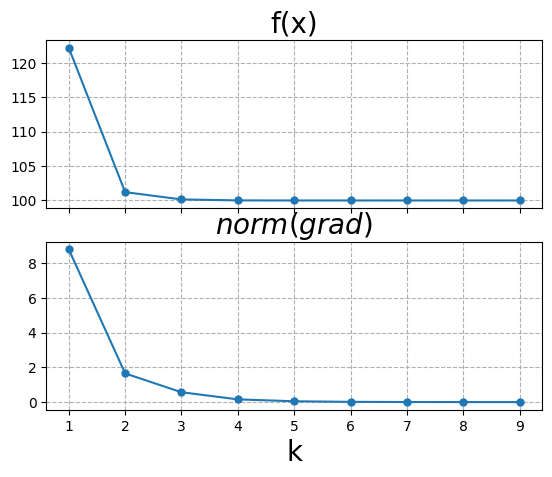

In [10]:
import matplotlib.pyplot as plt

# Plot the result. Compare the result of h(n) and h_c(n). (h(n)是代码计算结果，h_c(n)是手工计算结果))
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(list(range(1, len(fx)+1)), fx, marker = "o", markersize=5)       # plot h(n)
axs[0].set_title('f(x)', size=20)
axs[0].grid(linestyle = '--', which='major')
axs[1].plot(list(range(1, len(grad_norm)+1)), grad_norm, marker = "o", markersize=5)       # plot h_c(n)
axs[1].set_title('$ norm(grad) $', size=20)
axs[1].set_xlabel('k', size=20)
axs[1].grid(linestyle = '--', which='major')

## CG-PRP
- 使用FR公式
- 非精确线搜索：采用Armijo准则
  - 步长α=0.5，c=1e-3，γ=0.333
- 搜索终止条件：
  - $||g_k||<\epsilon, \epsilon=1e-3$， $g_k$为梯度
  - 最大迭代步长：100

In [11]:
#PRP
x0 = np.linspace(0.01, 1.00, 100)
fx, grad_norm, xk, k = conjungate(objfunc, grad_objfunc, x0, max_iter = 100, EPISILON = 1e-3, beta_method = "PRP")
print("迭代次数: ", k+1)
print("最后一次迭代得到的f(x): ", fx[-1])
print("最后一次迭代的梯度的范数: ", grad_norm[-1])

迭代次数:  13
最后一次迭代得到的f(x):  [100.00000019]
最后一次迭代的梯度的范数:  [0.00062283]


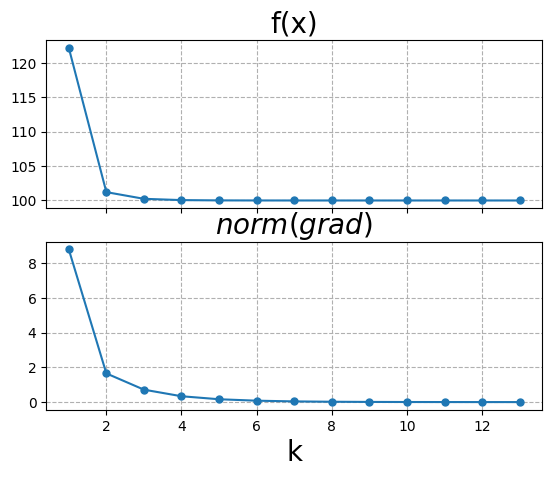

In [12]:
# Plot the result. Compare the result of h(n) and h_c(n). (h(n)是代码计算结果，h_c(n)是手工计算结果))
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(list(range(1, len(fx)+1)), fx, marker = "o", markersize=5)       # plot h(n)
axs[0].set_title('f(x)', size=20)
axs[0].grid(linestyle = '--', which='major')
axs[1].plot(list(range(1, len(grad_norm)+1)), grad_norm, marker = "o", markersize=5)       # plot h_c(n)
axs[1].set_title('$ norm(grad) $', size=20)
axs[1].set_xlabel('k', size=20)
axs[1].grid(linestyle = '--', which='major')

In [13]:
print("迭代次数: ", "8")
print("最后一次迭代得到的f(x): ", fx[7])
print("最后一次迭代的梯度的范数: ", grad_norm[7])

迭代次数:  8
最后一次迭代得到的f(x):  [100.0001996]
最后一次迭代的梯度的范数:  [0.01999496]


## Scipy调库结果
- 使用scipy作简单的验证

In [14]:
import scipy

Func = lambda x: objfunc(x)

result = scipy.optimize.minimize(Func, x0, method='L-BFGS-B', options={'disp': False})

objfunc(result.x)

100.00000000049761